In [13]:
import pandas as pd
from pandas.tseries import converter
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()

In [7]:
## Import dataset and drop unused columns & temperatures over 35.
df = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_sst0717-0618.csv',
                   parse_dates=[[0, 1]], index_col=0)
df = df.drop(columns=['s9_id', 'threshold', 'const_err']) 
df = df[(df.temperature < 35) & (df.temperature > 15)]
df = df[:'2018-02-13'] # Drop dates after Feb 13.

In [8]:
## The temperature dataset has a gap in data from '2017-10-01' to '2017-11-01'.
## This combined Chl/Temp will split both datasets into before and after segments 
## so as to better understand trends without data gaps.

test = df['2017-10-01':'2017-11-01'] # Highlights first data gap

SST30a = df[:'2017-10-01']
SSTa = df[:'2017-10-01']
SSTb = df['2017-11-01':]
SSTb = SSTb[(SSTb.temperature < 27) & (SSTb.temperature > 17)]

np.std(df.temperature)


3.5561864884415844

In [9]:
## Create three zones according to sampling depths
## A
zone1a = SSTa[SSTa.depth < 10].rename(columns={"temperature": "zone1a"})
zone2a = SSTa[(SSTa.depth >= 10) & (SSTa.depth < 30)].rename(
        columns={"temperature": "zone2a"})
zone3a = SSTa[(SSTa.depth >= 30) & (SSTa.depth < 50)].rename(
        columns={"temperature": "zone3a"})
z1_avga = zone1a.zone1a.resample('D').mean()
z2_avga = zone2a.zone2a.resample('D').mean()
z3_avga = zone3a.zone3a.resample('D').mean()

In [11]:
## B
zone1b = SSTb[SSTb.depth < 10].rename(columns={"temperature": "zone1b"})
zone2b = SSTb[(SSTb.depth >= 10) & (SSTb.depth < 30)].rename(
        columns={"temperature": "zone2b"})
zone3b = SSTb[(SSTb.depth >= 30) & (SSTb.depth < 50)].rename(
        columns={"temperature": "zone3b"})
z1_avgb = zone1b.zone1b.resample('D').mean()
z2_avgb = zone2b.zone2b.resample('D').mean()
z3_avgb = zone3b.zone3b.resample('D').mean()

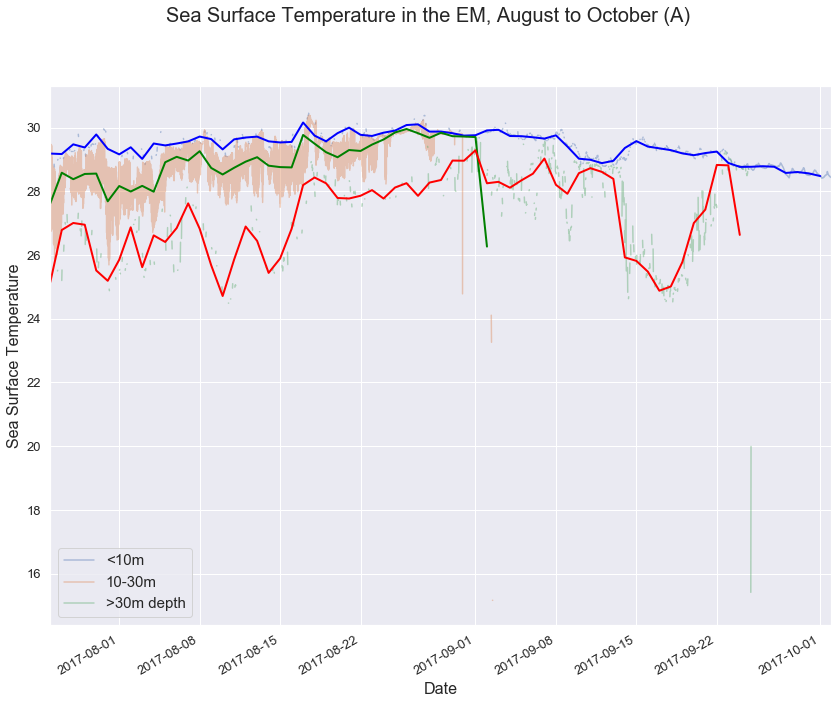

In [15]:
## Combine zones and plot Section A
SSTa = pd.concat([zone1a, zone2a, zone3a], sort=False).drop(columns='depth')
figa = SSTa.plot(fontsize=13, figsize=(14,11), alpha=0.4)
figa.plot(z1_avga, color='blue', linewidth=2)
figa.plot(z2_avga, color='green', linewidth=2)
figa.plot(z3_avga, color='red', linewidth=2)
plt.suptitle('Sea Surface Temperature in the EM, August to October (A)', fontsize=20)
plt.xlabel("Date", fontsize=16), plt.ylabel("Sea Surface Temperature", fontsize=16)
figa.legend(['<10m', '10-30m', '>30m depth'], fontsize=15)

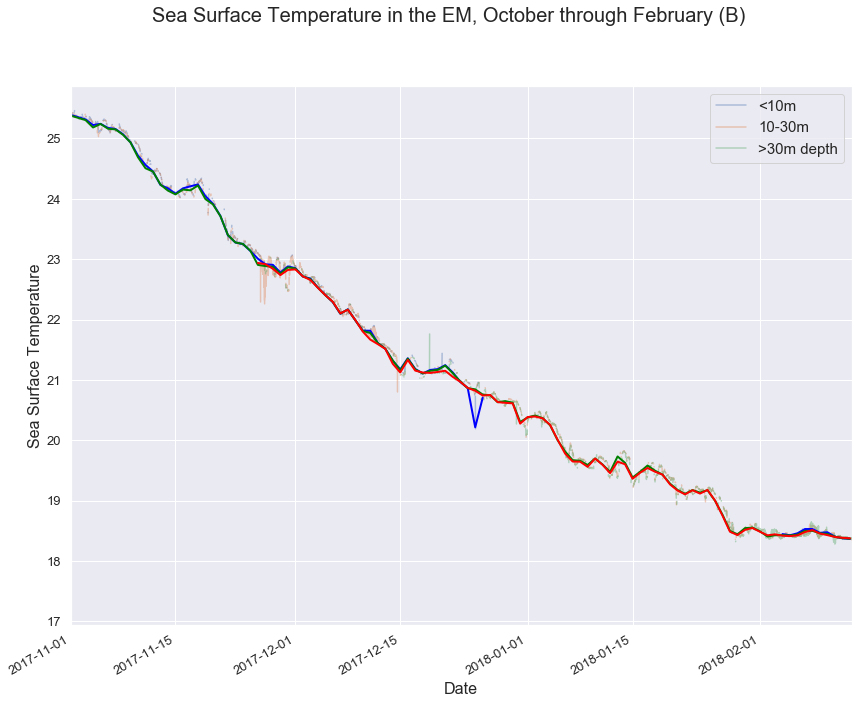

In [17]:
## Combined zones and plot Section B
SSTb = pd.concat([zone1b, zone2b, zone3b], sort=False).drop(columns='depth')
figb = SSTb.plot(fontsize=13, figsize=(14,11), alpha=0.4)
figb.plot(z1_avgb, color='blue', linewidth=2)
figb.plot(z2_avgb, color='green', linewidth=2)
figb.plot(z3_avgb, color='red', linewidth=2)
plt.suptitle('Sea Surface Temperature in the EM, October through February (B)', fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Sea Surface Temperature", fontsize=16)
figb.legend(['<10m', '10-30m', '>30m depth'], fontsize=15)